In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from adjustText import adjust_text
import contextily as ctx
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize

ModuleNotFoundError: No module named 'geopandas'

In [94]:
# Read the data from the CSV file including 'Year' and 'Country'
df = pd.read_csv("merged_data.csv", usecols=['Year',"GDP", 'Country', "Value", " Indicator Name",  " Indicator Code", 'Life expectancy'])
df = df[df[" Indicator Name"].str.contains("Lower secondary completion rate") | df[" Indicator Name"].str.contains("Primary completion rate")]
df = df[df[" Indicator Code"].str.contains("total") == True]
df.columns = df.columns.str.strip()
print(df.columns)
# Filter data for the year 2005 and drop duplicates
# df = df[df['Year'] == 2005].drop_duplicates()

# Debug: Print the filtered data
print("Filtered Data:")
print(df)
#
# Separate the columns to be normalized
columns_to_normalize = ['Value',"GDP", 'Life expectancy']
columns_not_to_normalize = ['Year', 'Country', 'Indicator Name', "Indicator Code" ]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data to be normalized
normalized_data = scaler.fit_transform(df[columns_to_normalize])

# Debug: Print the normalized data
print("\nNormalized Data:")
print(normalized_data)

# Create a DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Combine the non-normalized columns with the normalized columns
final_df = pd.concat([df[columns_not_to_normalize].reset_index(drop=True), normalized_df], axis=1)

# Debug: Print the final DataFrame
print("\nFinal DataFrame:")
print(final_df)

# Save the normalized data to a new CSV file
final_df.to_csv("Normalized_Dataset_edu-prisectet.csv", index=False)



Index(['Country', 'Year', 'Life expectancy', 'Indicator Name',
       'Indicator Code', 'Value', 'GDP'],
      dtype='object')
Filtered Data:
            Country  Year  Life expectancy                   Indicator Name  \
88      Afghanistan  2015             65.0  Lower secondary completion rate   
138     Afghanistan  2015             65.0          Primary completion rate   
252     Afghanistan  2014             59.9  Lower secondary completion rate   
302     Afghanistan  2014             59.9          Primary completion rate   
416     Afghanistan  2013             59.9  Lower secondary completion rate   
...             ...   ...              ...                              ...   
458846     Zimbabwe  2002             44.8          Primary completion rate   
458960     Zimbabwe  2001             45.3  Lower secondary completion rate   
459010     Zimbabwe  2001             45.3          Primary completion rate   
459124     Zimbabwe  2000             46.0  Lower secondary completi

In [95]:
final_df = final_df[final_df['Year'] == 2010]
final_df.dropna(subset=['Value'], inplace=True)
final_df.dropna(subset=['GDP'], inplace=True)
final_df.to_csv("Normalized_Dataset_edu-prisectet.csv", index=False)

In [96]:
df = pd.read_csv("Normalized_Dataset_edu-prisectet.csv", usecols=['Year',"GDP", 'Country', "Value", "Indicator Name",  "Indicator Code", 'Life expectancy'])
second_df = df[df["Indicator Name"].str.contains("Lower secondary completion rate") == True]
third_df = df[df["Indicator Name"].str.contains("Primary completion rate") == True]
second_df.to_csv("Normalized_Dataset_edu-prisectet1.csv", index=False)
third_df.to_csv("Normalized_Dataset_edu-prisectet2.csv", index=False)

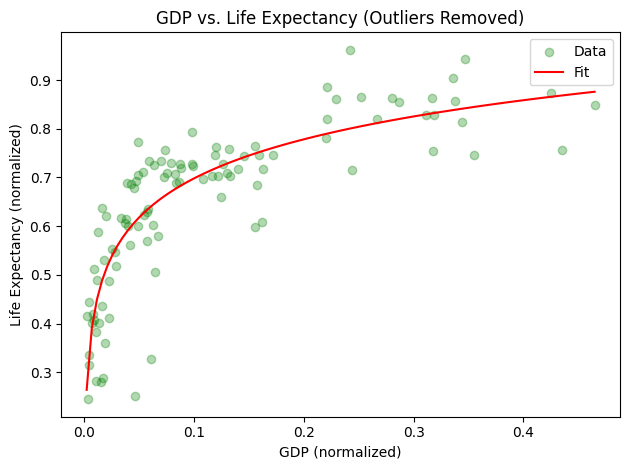

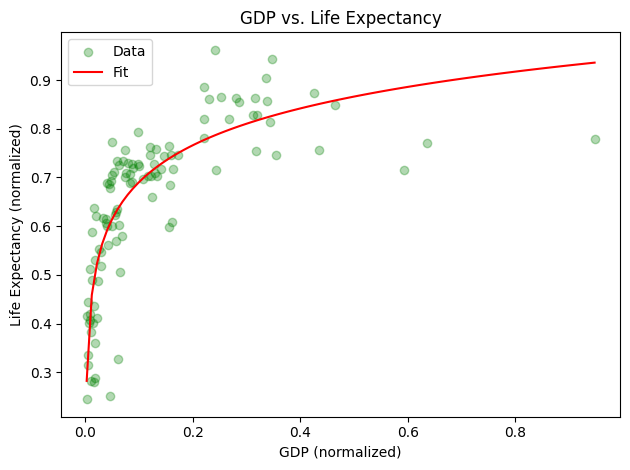

In [108]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Assuming second_df and final_df are already defined DataFrames

# Define a logarithmic function for fitting
def log_func(x, a, b):
    return a * np.log(x) + b

# Function to remove outliers based on z-score
def remove_outliers(df, column, z_score_threshold=3):
    return df[(np.abs(df[column] - df[column].mean()) / df[column].std()) < z_score_threshold]

# Remove outliers from second_df
second_df_cleaned = remove_outliers(second_df, "GDP")
second_df_cleaned = remove_outliers(second_df_cleaned, "Life expectancy")

# Extract cleaned data for fitting
x_second_cleaned = second_df_cleaned["GDP"].values
y_second_cleaned = second_df_cleaned["Life expectancy"].values

# Fit the data to the logarithmic function
popt, pcov = curve_fit(log_func, x_second_cleaned, y_second_cleaned)

# Generate x values for the fitted line
x_fit = np.linspace(min(x_second_cleaned), max(x_second_cleaned), 100)
y_fit = log_func(x_fit, *popt)

# Plot using Plotly
scatter = go.Scatter(x=second_df_cleaned["GDP"], y=second_df_cleaned["Life expectancy"], mode='markers', name='Data')
line = go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Fit', line=dict(color='red'))

layout = go.Layout(title='GDP vs. Life Expectancy (Outliers Removed)',
                   xaxis=dict(title='GDP (normalized)'),
                   yaxis=dict(title='Life Expectancy (normalized)'))


# Optionally, you can use matplotlib to show the fit
plt.scatter(second_df_cleaned['GDP'], second_df_cleaned['Life expectancy'], alpha=0.3, c='green', label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fit')
plt.xlabel('GDP (normalized)')
plt.ylabel('Life Expectancy (normalized)')
plt.title('GDP vs. Life Expectancy (Outliers Removed)')
plt.legend()
plt.tight_layout()
plt.show()
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Assuming second_df and final_df are already defined DataFrames

# Define a logarithmic function for fitting
def log_func(x, a, b):
    return a * np.log(x) + b

# Extract cleaned data for fitting
x_second_cleaned = second_df["GDP"].values
y_second_cleaned = second_df["Life expectancy"].values

# Fit the data to the logarithmic function
popt, pcov = curve_fit(log_func, x_second_cleaned, y_second_cleaned)

# Generate x values for the fitted line
x_fit = np.linspace(min(x_second_cleaned), max(x_second_cleaned), 100)
y_fit = log_func(x_fit, *popt)

# Plot using Plotly
scatter = go.Scatter(x=second_df["GDP"], y=second_df["Life expectancy"], mode='markers', name='Data')
line = go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Fit', line=dict(color='red'))

layout = go.Layout(title='GDP vs. Life Expectancy (Outliers Removed)',
                   xaxis=dict(title='GDP (normalized)'),
                   yaxis=dict(title='Life Expectancy (normalized)'))



# Optionally, you can use matplotlib to show the fit
plt.scatter(second_df['GDP'], second_df['Life expectancy'], alpha=0.3, c='green', label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fit')
plt.xlabel('GDP (normalized)')
plt.ylabel('Life Expectancy (normalized)')
plt.title('GDP vs. Life Expectancy')
plt.legend()
plt.tight_layout()
plt.show()

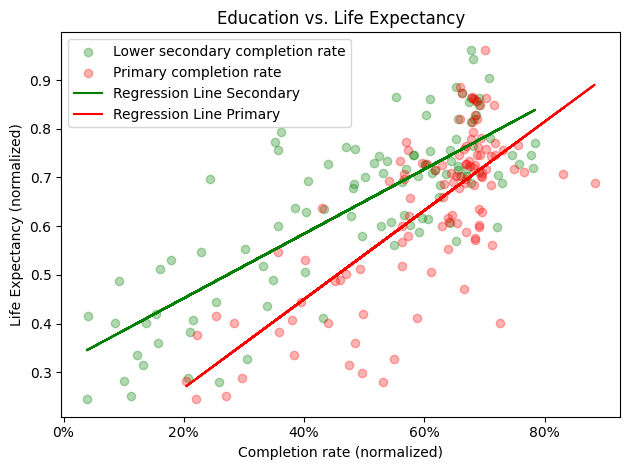

In [100]:
import matplotlib.ticker as mtick
plt.scatter(second_df['Value'], second_df['Life expectancy'], alpha=0.3, c='green', label='Lower secondary completion rate')
plt.scatter(third_df['Value'], third_df['Life expectancy'], alpha=0.3, c='red', label='Primary completion rate')
plt.xlabel('Completion rate (normalized)')
plt.ylabel('Life Expectancy (normalized)')
plt.title('Education vs. Life Expectancy')

x_clean = second_df['Value']
y_clean = second_df['Life expectancy']

# Performing linear regression
slope, intercept = np.polyfit(x_clean, y_clean, 1)

# Calculate the values of the regression line
regression_line = slope * x_clean + intercept

# Create a combined scatter plot with the regression line
plt.plot(x_clean, regression_line, color='green', label='Regression Line Secondary')

x_clean = third_df['Value']
y_clean = third_df['Life expectancy']

# Performing linear regression
slope, intercept = np.polyfit(x_clean, y_clean, 1)

# Calculate the values of the regression line
regression_line = slope * x_clean + intercept
ax = plt.subplot(1,1,1)
# Create a combined scatter plot with the regression line
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.plot(x_clean, regression_line, color='red', label='Regression Line Primary')
plt.legend()
plt.tight_layout()
plt.show()

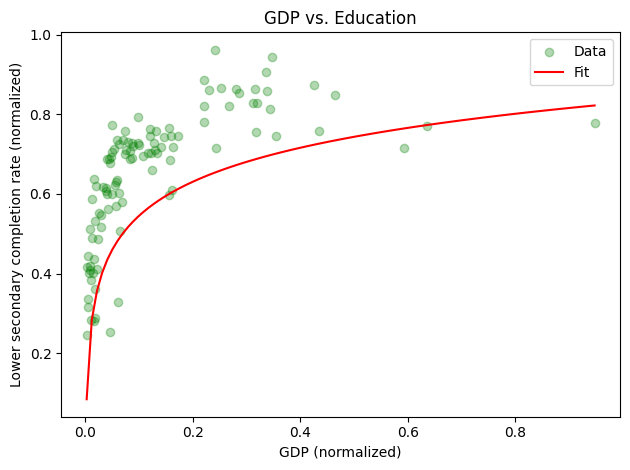

In [110]:
def log_func(x, a, b):
    return a * np.log(x) + b

# Extract cleaned data for fitting
x_second_cleaned = second_df["GDP"].values
y_second_cleaned = second_df["Value"].values

# Fit the data to the logarithmic function
popt, pcov = curve_fit(log_func, x_second_cleaned, y_second_cleaned)

# Generate x values for the fitted line
x_fit = np.linspace(min(x_second_cleaned), max(x_second_cleaned), 100)
y_fit = log_func(x_fit, *popt)

# Plot using Plotly
scatter = go.Scatter(x=second_df["GDP"], y=second_df["Value"], mode='markers', name='Data')
line = go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Fit', line=dict(color='red'))

layout = go.Layout(title='GDP vs. Life Expectancy (Outliers Removed)',
                   xaxis=dict(title='GDP (normalized)'),
                   yaxis=dict(title='Completion rate (normalized)'))



# Optionally, you can use matplotlib to show the fit
plt.scatter(second_df['GDP'], second_df['Life expectancy'], alpha=0.3, c='green', label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fit')
plt.xlabel('GDP (normalized)')
plt.ylabel('Lower secondary completion rate (normalized)')
plt.title('GDP vs. Education')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_103850/2968504282.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_103850/2968504282.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



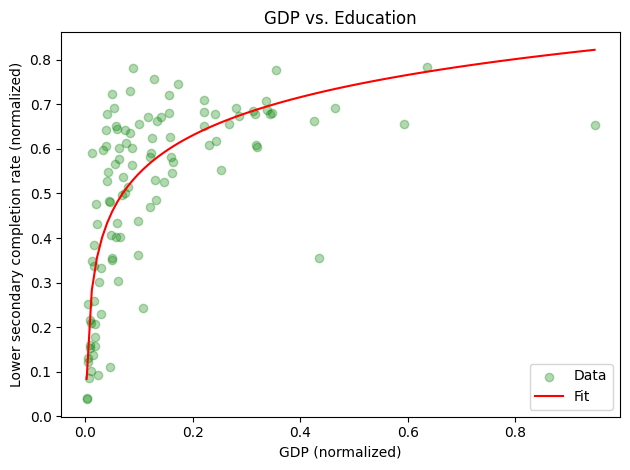

In [126]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from scipy.optimize import curve_fit
from scipy.stats import zscore
import matplotlib.pyplot as plt

def log_func(x, a, b):
    return a * np.log(x) + b

# Example data frame (replace this with your actual data)
# second_df = pd.DataFrame({
#     'GDP': [...],
#     'Value': [...]
# })

# Calculate the z-scores of the data
second_df['z_score_GDP'] = zscore(second_df['GDP'])
second_df['z_score_Value'] = zscore(second_df['Value'])

# Define a threshold to identify outliers
threshold = 6

# Filter the data to remove outliers
filtered_df = second_df[(np.abs(second_df['z_score_GDP']) < threshold) & (np.abs(second_df['z_score_Value']) < threshold)]

# Extract cleaned data for fitting
x_cleaned = filtered_df["GDP"].values
y_cleaned = filtered_df["Value"].values

# Fit the data to the logarithmic function
popt, pcov = curve_fit(log_func, x_cleaned, y_cleaned)

# Generate x values for the fitted line
x_fit = np.linspace(min(x_cleaned), max(x_cleaned), 100)
y_fit = log_func(x_fit, *popt)

# Plot using Plotly
scatter = go.Scatter(x=filtered_df["GDP"], y=filtered_df["Value"], mode='markers', name='Data')
line = go.Scatter(x=x_fit, y=y_fit, mode='lines', name='Fit', line=dict(color='red'))

layout = go.Layout(title='GDP vs. Life Expectancy (Outliers Removed)',
                   xaxis=dict(title='GDP (normalized)'),
                   yaxis=dict(title='Completion rate (normalized)'))


# Optionally, you can use matplotlib to show the fit
plt.scatter(filtered_df['GDP'], filtered_df['Value'], alpha=0.3, c='green', label='Data')
plt.plot(x_fit, y_fit, color='red', label='Fit')
plt.xlabel('GDP (normalized)')
plt.ylabel('Lower secondary completion rate (normalized)')
plt.title('GDP vs. Education')
plt.legend()
plt.tight_layout()
plt.show()
